In [2]:
from functions import *
from agent import *
from collaborate_rescue import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from functools import reduce
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def get_mean_and_std(lst):
    return np.average(lst), np.std(lst)

def get_trust(array):
    return (np.exp(array)-np.exp(-array))/(np.exp(array)+np.exp(-array))

## 最优型与任务型

### 协作绩效

In [10]:
# 低等信任
delta = 0.8
ita = 1
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----


In [31]:
task_counts = [x.task_count.sum()/20000 for x in results]

In [27]:
get_mean_and_std(task_counts)
'''
[0.04335,
 0.02565,
 0.0085,
 0.0423,
 0.0068,
 0.02125,
 0.04315,
 0.0129,
 0.0116,
 0.00575]
'''

(0.022125000000000002, 0.014823246101984544)

In [10]:
# 高等信任
delta = 0.2
ita = 1
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))
    break

----0----


In [ ]:
task_counts = [x.task_count.sum()/20000 for x in results]

In [22]:
get_mean_and_std(task_counts)
'''
[0.04335,
 0.02565,
 0.0085,
 0.0423,
 0.0068,
 0.02125,
 0.04315,
 0.0129,
 0.0116,
 0.00575]
'''

(0.03395, 0.01600724835816575)

### 信任演化

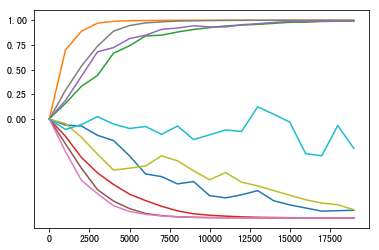

In [24]:
# 低等信任
deltas = 0.8
ita = 1
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

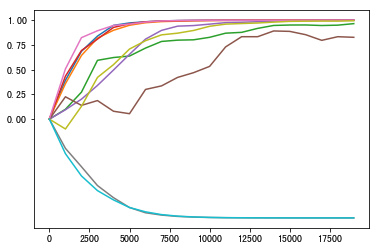

In [25]:
# 高等信任
deltas = 0.2
ita = 1
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [3]:
# 低等信任
delta = 0.8
ita = 1
w = 1

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [4]:
cvgs_1

[0.6551,
 0.87155,
 0.2004,
 0.9743,
 0.2809,
 0.96405,
 0.73115,
 0.4938,
 0.36475,
 0.163]

In [9]:
get_mean_and_std(cvgs_1)

(0.5699000000000001, 0.2960816610328981)

In [ ]:
# 高等信任
deltas = 0.2
ita = 1
w = 1

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [7]:
cvgs_2

[0.3889,
 0.4493,
 0.85885,
 0.39235,
 0.808,
 0.2652,
 0.9985,
 0.6495,
 0.5778,
 0.4259]

In [10]:
get_mean_and_std(cvgs_2)

(0.58143, 0.2283327146950257)

## 最优型与适应型

### 协作绩效

In [12]:
# 低等信任
delta = 0.8
ita = 1
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))
    break

----0----


In [35]:
task_counts = [x.task_count.sum()/20000 for x in results]

In [37]:
# 低等信任
get_mean_and_std(task_counts)
'''
[0.0938,
 0.1049,
 0.10205,
 0.0945,
 0.07845,
 0.09525,
 0.10105,
 0.1006,
 0.0978,
 0.1036]
'''

(0.0972, 0.007243824956471545)

In [42]:
# 高等信任
delta = 0.2
ita = 1
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [43]:
task_counts = [x.task_count.sum()/20000 for x in results]

In [45]:
# 高等信任
get_mean_and_std(task_counts)
'''
[0.10185,
 0.08555,
 0.09525,
 0.0987,
 0.09495,
 0.0905,
 0.0931,
 0.0847,
 0.10705,
 0.0953]
'''

(0.094695, 0.006513771948725255)

### 信任演化

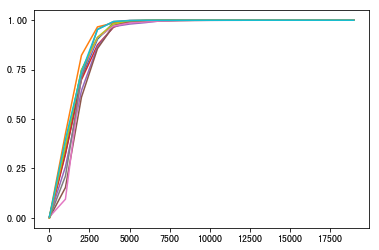

In [5]:
# 低等信任
delta = 0.8
ita = 1
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

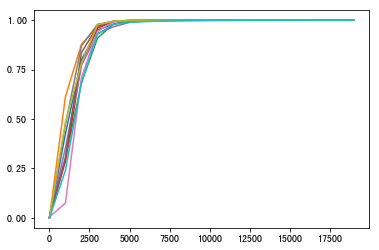

In [27]:
# 高等信任
deltas = 0.2
ita = 1
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [46]:
# 低等信任
deltas = 0.8
ita = 1
w = 0.5

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [54]:
get_mean_and_std(cvgs_1)
'''
[0.927,
 0.9485,
 0.8697,
 0.93225,
 0.93265,
 0.70735,
 0.96765,
 0.97515,
 0.75745,
 0.97445]
'''

(0.8992150000000002, 0.08905090412230524)

In [49]:
# 高等信任
deltas = 0.2
ita = 1
w = 0.5

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [52]:
get_mean_and_std(cvgs_2)
'''
[0.9783,
 0.719,
 0.68595,
 0.9807,
 0.67575,
 0.95115,
 0.75135,
 0.9932,
 0.9613,
 0.99455]
'''

(0.869125, 0.13344435778630734)

## 满意型与任务型

### 协作绩效

In [46]:
# 低等信任
delta = 0.8
ita = 0.5
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [47]:
task_counts = [x.task_count.sum()/20000 for x in results]

In [49]:
get_mean_and_std(task_counts)
'''
[0.0192,
 0.0616,
 0.0104,
 0.03655,
 0.0103,
 0.0097,
 0.01045,
 0.0949,
 0.01135,
 0.022]
'''

(0.028645000000000004, 0.02707418927687402)

In [54]:
# 高等信任
delta = 0.2
ita = 0.5
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [55]:
task_counts = [x.task_count.sum()/20000 for x in results]

In [57]:
# 高等信任
get_mean_and_std(task_counts)
'''
[0.03585,
 0.0066,
 0.00785,
 0.05405,
 0.0087,
 0.01765,
 0.0151,
 0.0069,
 0.02945,
 0.0311]
'''

(0.021325, 0.015038604489778964)

### 信任演化

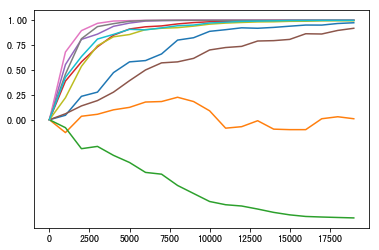

In [28]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

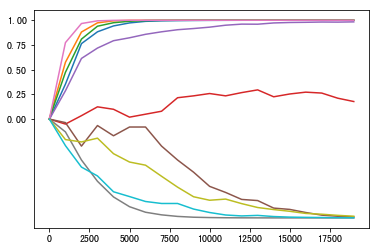

In [29]:
# 信任演化：高等
deltas = 0.2
ita = 0.5
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [55]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 1

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [56]:
cvgs_1

[0.5486,
 0.9856,
 0.6041,
 0.6944,
 0.9061,
 0.7644,
 0.9735,
 0.96695,
 0.7876,
 0.3873]

In [59]:
get_mean_and_std(cvgs_1)
'''
[0.5486,
 0.9856,
 0.6041,
 0.6944,
 0.9061,
 0.7644,
 0.9735,
 0.96695,
 0.7876,
 0.3873]
'''

(0.761855, 0.19328767478812509)

In [ ]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 1

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [58]:
cvgs_2

[0.28695,
 0.8847,
 0.95165,
 0.5803,
 0.8327,
 0.47025,
 0.6966,
 0.71825,
 0.9768,
 0.59435]

In [60]:
get_mean_and_std(cvgs_2)
'''
[0.28695,
 0.8847,
 0.95165,
 0.5803,
 0.8327,
 0.47025,
 0.6966,
 0.71825,
 0.9768,
 0.59435]
'''

(0.6992550000000001, 0.20997471091776743)

## 满意型与适应型

### 协作绩效

In [59]:
# 低等信任
delta = 0.8
ita = 0.5
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [60]:
task_counts = [x.task_count.sum()/20000 for x in results]

In [62]:
# 低等信任
get_mean_and_std(task_counts)
'''
[0.1042,
 0.0915,
 0.1006,
 0.10575,
 0.08825,
 0.1057,
 0.0975,
 0.08425,
 0.0918,
 0.08105]
'''

(0.09505999999999999, 0.00854683567175595)

In [67]:
# 高等信任
delta = 0.2
ita = 0.5
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [68]:
task_counts = [x.task_count.sum()/20000 for x in results]

In [70]:
# 高等信任
get_mean_and_std(task_counts)
'''
[0.102,
 0.1159,
 0.1147,
 0.09545,
 0.091,
 0.09305,
 0.0886,
 0.10265,
 0.1029,
 0.10205]
'''

(0.10083, 0.008749919999634283)

### 信任演化

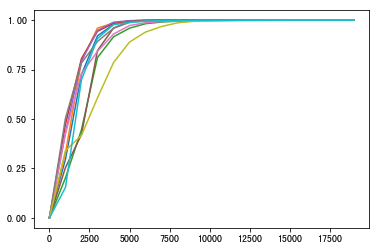

In [30]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

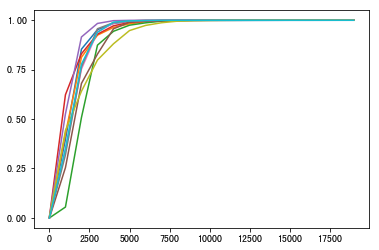

In [31]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*1000 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [61]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 0.5

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [65]:
get_mean_and_std(cvgs_1)
'''
[0.65835,
 0.8075,
 0.90785,
 0.6521,
 0.9148,
 0.8314,
 0.87855,
 0.9511,
 0.91385,
 0.99455]
'''

(0.851005, 0.11026773882237723)

In [63]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 0.5

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [66]:
get_mean_and_std(cvgs_2)
'''
[0.91265,
 0.4552,
 0.83695,
 0.9121,
 0.9807,
 0.82985,
 0.87455,
 0.67695,
 0.9769,
 0.91785]
'''

(0.83737, 0.15197643106745204)

## 画图

In [ ]:
'''
机器人算法收敛

A 最优型人类 vs 任务型机器人
低等信任环境
0.5699
高等信任环境
0.5813
B 最优型人类 vs 顺从型机器人
低等信任环境
0.8992
高等信任环境
0.8691
C 满意型人类 vs 任务型机器人
低等信任环境
0.7619
高等信任环境
0.6993
D 满意型人类 vs 顺从型机器人
低等信任环境
0.8510
高等信任环境
0.8374

'''

In [ ]:
'''
协作绩效

A 最优型人类 vs 任务型机器人
0.0221
0.0340
B 最优型人类 vs 顺从型机器人
0.0972
0.0947
C 满意型人类 vs 任务型机器人
0.0286
0.0213
D 满意型人类 vs 顺从型机器人
0.0951
0.1008

'''

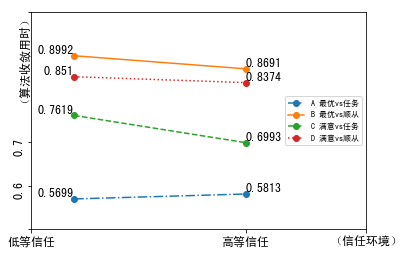

In [9]:
a = np.array([[[0.2, 0.5699], [1.2, 0.5813]],
             [[0.2, 0.8992], [1.2, 0.8691]],
             [[0.2, 0.7619], [1.2, 0.6993]],
             [[0.2, 0.8510], [1.2, 0.8374]]])


plt.ylim(0.5, 1)
plt.xlim(0, 1)
plt.xticks([-0.05, 1.2, 1.9], ['低等信任', '高等信任', '（信任环境）'],fontsize=12)
plt.yticks([0.5, 0.6, 0.7,  1], ['', 0.6, 0.7,  '（算法收敛用时）'], fontsize=12, rotation=90)
plt.plot(a[0][:, 0], a[0][:, 1], '-.', marker='o')
plt.plot(a[1][:, 0], a[1][:, 1], '-', marker='o')
plt.plot(a[2][:, 0], a[2][:, 1], '--', marker='o')
plt.plot(a[3][:, 0], a[3][:, 1], ':', marker='o')
for i in range(4):
    plt.text(a[i,0,0],a[i,0,1],a[i,0,1],ha='right', va='bottom', fontsize=12)
    plt.text(a[i,1,0],a[i,1,1],a[i,1,1],ha='left', va='bottom', fontsize=12)

plt.legend(['A 最优vs任务', 'B 最优vs顺从', 'C 满意vs任务', 'D 满意vs顺从'], loc='center right', fontsize=8)
plt.show()

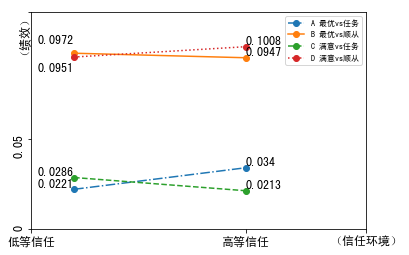

In [15]:
a = np.array([[[0.2, 0.0221], [1.2, 0.0340]],
             [[0.2, 0.0972], [1.2, 0.0947]],
             [[0.2, 0.0286], [1.2, 0.0213]],
             [[0.2, 0.0951], [1.2, 0.1008]]])
plt.ylim(0, 0.12)
plt.xlim(0, 1)
plt.xticks([-0.05, 1.2, 1.9], ['低等信任', '高等信任', '（信任环境）'],fontsize=12)
plt.yticks([0, 0.05, 0.12], [0, 0.05, '（绩效）'], fontsize=12, rotation=90)
plt.plot(a[0][:, 0], a[0][:, 1], '-.', marker='o')
plt.plot(a[1][:, 0], a[1][:, 1], '-', marker='o')
plt.plot(a[2][:, 0], a[2][:, 1], '--', marker='o')
plt.plot(a[3][:, 0], a[3][:, 1], ':', marker='o')
for i in range(4):
    e = 0
    if a[i, 0, 1] == 0.0972:
        e = 0.004
    if a[i, 0, 1] == 0.0951:
        e = -0.009
    plt.text(a[i,0,0],a[i,0,1]+e,a[i,0,1],ha='right', va='bottom', fontsize=12)
    plt.text(a[i,1,0],a[i,1,1],a[i,1,1],ha='left', va='bottom', fontsize=12)

plt.legend(['A 最优vs任务', 'B 最优vs顺从', 'C 满意vs任务', 'D 满意vs顺从'], loc='upper right', fontsize=8)
plt.show()